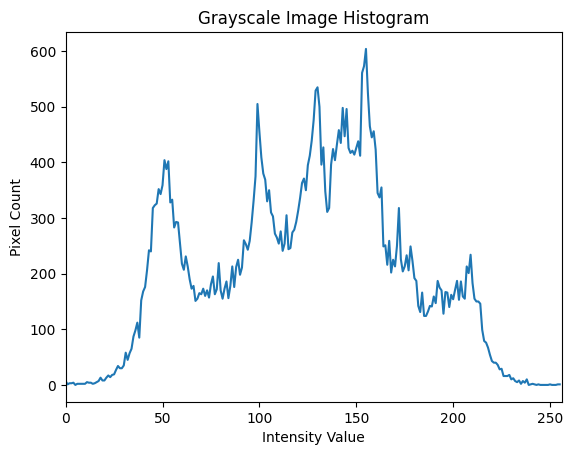

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("/content/download.jpeg", cv2.IMREAD_GRAYSCALE)

# Compute histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Display histogram
plt.figure()
plt.title("Grayscale Image Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


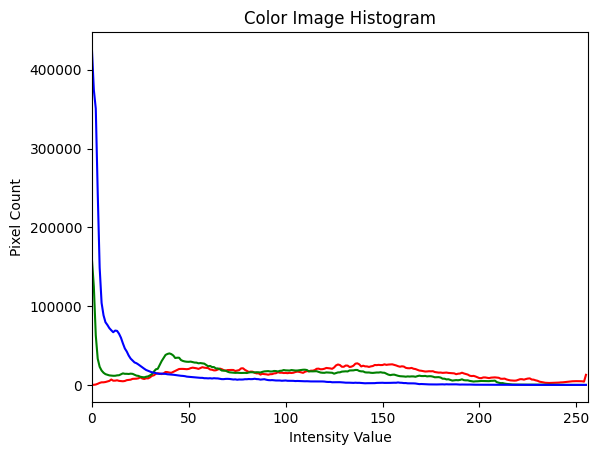

In [22]:
# Load the color image
image_color = cv2.imread("/content/Parrot.jpg")
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Split into RGB channels
channels = ('r', 'g', 'b')
colors = ('red', 'green', 'blue')

plt.figure()
plt.title("Color Image Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

# Compute and plot histogram for each channel
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_color], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.xlim([0, 256])
plt.show()


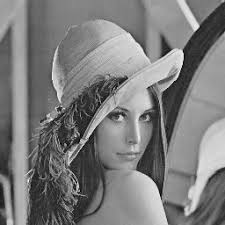

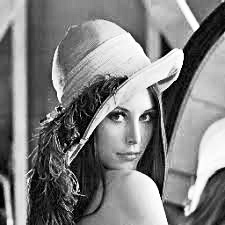

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import Colab-specific function

# Load the grayscale image
image = cv2.imread("download.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display original and enhanced images
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
cv2_imshow(equalized_image)


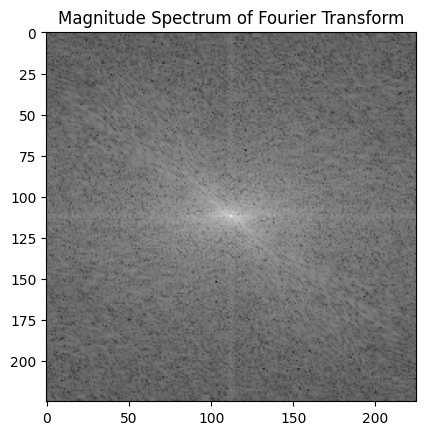

In [20]:
# Load the grayscale image
image = cv2.imread("download.jpeg", cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fast Fourier Transform (FFT)
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

# Display magnitude spectrum
plt.figure()
plt.title("Magnitude Spectrum of Fourier Transform")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()


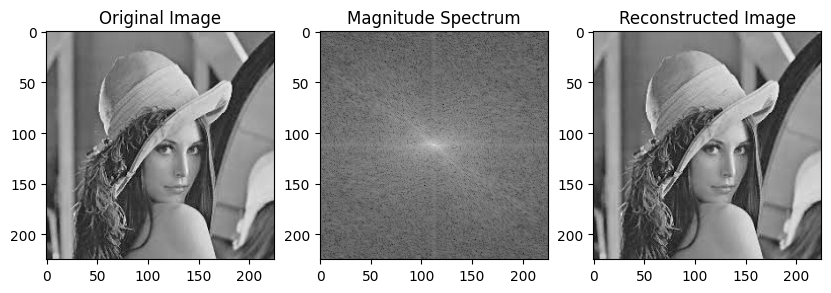

In [21]:
# Compute the Inverse Fourier Transform
idft_shift = np.fft.ifftshift(dft_shift)  # Shift back
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')

plt.show()


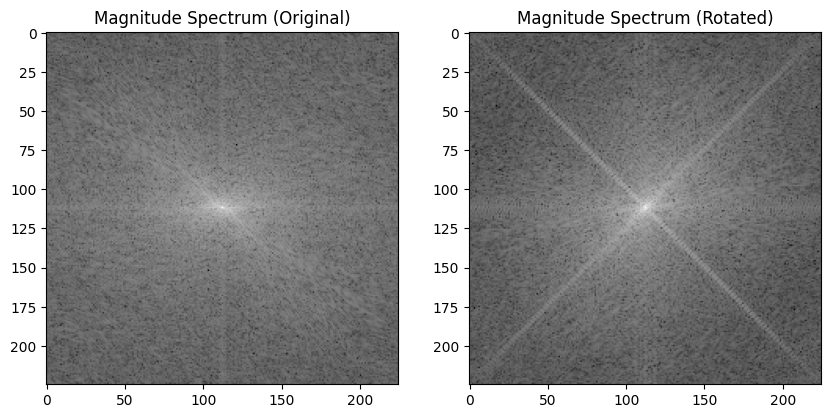

In [23]:
# Rotate the image by 45 degrees
(h, w) = image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Compute FFT of the rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_shift_rotated = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_shift_rotated) + 1)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Magnitude Spectrum (Original)")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Magnitude Spectrum (Rotated)")
plt.imshow(magnitude_spectrum_rotated, cmap='gray')

plt.show()
